<a href="https://colab.research.google.com/github/Abinav-M/GRIP_The_Spark_Foundation/blob/master/SuperStore_BusinessAnalytics_TSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation: Task 5**

Name: Sandeep

Date: 2nd October 2020
<br>
</br>

---
<br>
</br>

##**Problem Statement:**

Perform **Exploratory Data Analysis** on the sales data of the given sampleSuperStore to find the key business areas to improve profit.




Mounting google drive to colab


In [ ]:
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)           # we mount the google drive at /content/drive


/content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



#Importing the Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


numpy version: 1.18.5

pandas version: 1.0.5

matplotlib version 3.2.2

seaborn version 0.10.1

Date: 15 / 08 / 2020

#Getting and Cleaning the data

In [ ]:
superstore=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Datasets/SampleSuperstore.csv")
superstore

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [ ]:
superstore.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [ ]:
print("rows:",9994)
print("columns: ",len(superstore.columns))

rows: 9994
columns:  13


In [ ]:
superstore.drop_duplicates(keep='first',inplace=True)
superstore

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


**17 Identical Rows where removed**

In [ ]:
##Unique Values in each parameter
print("Ship Mode: ", superstore['Ship Mode'].unique())
print("Countries:",superstore['Country'].unique())
print("Cities: ",len(superstore['City'].unique()))

Ship Mode:  ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Countries: ['United States']
Cities:  531


#Data Analysis

###**Now that we have cleaned the data lets learn about the current sales stats**

Text(0.5, 1.0, 'Profit Loss Spectrum')

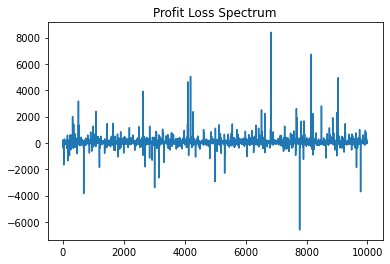

In [ ]:
profit_column=superstore['Profit']
plt.plot(profit_column)
plt.title("Profit Loss Spectrum")

In [ ]:
print("Maximum Profit: ",profit_column.max())

Maximum Profit:  8399.976


In [ ]:
print("Least profit ",profit_column.min())

Least profit  -6599.978


**Here we notice that there is a huge range in the profits and we notice the maximum loss is 6599 dollars. Lets further get information on the losses**

In [ ]:
superstore['Profit']>=0

0        True
1        True
2        True
3       False
4        True
        ...  
9989     True
9990     True
9991     True
9992     True
9993     True
Name: Profit, Length: 9977, dtype: bool

In [ ]:
profit=superstore[superstore['Profit']>=0]
profit

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.960,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.940,3,0.0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2,0.2,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.860,7,0.0,14.1694
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200


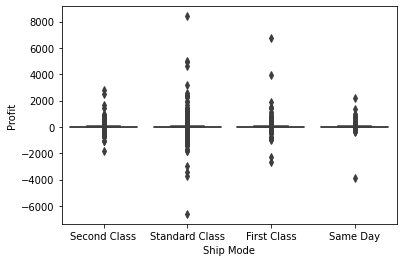

In [ ]:
sns.boxplot(superstore['Ship Mode'],profit_column)

**We can see from the following boxplot that Standard Class has both the maximum profit and maximum loss**

---

###**Shipmode Insights**

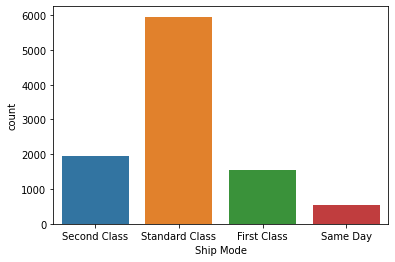

In [ ]:
##Usage of shipmode
sns.countplot(x=superstore['Ship Mode'])

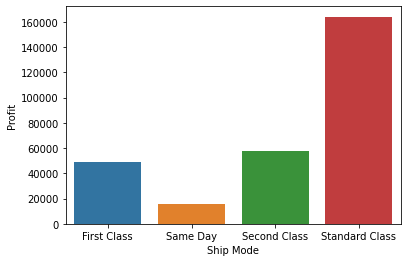

In [ ]:
##Lets see profits of the different shipmodes
shipmode_sum=superstore.loc[:,['Ship Mode','Profit']]
shipmode_sum=shipmode_sum.groupby(['Ship Mode'], as_index=False).sum()
sns.barplot(x=shipmode_sum['Ship Mode'], y=shipmode_sum['Profit'])

In [ ]:
shipmode_sum.head()

,Ship Mode,Profit
0,First Class,48953.6561
1,Same Day,15871.8869
2,Second Class,57446.6516
3,Standard Class,163969.2280


**Here we can see that even though the standard shipping mode had the both the maximum loss and the maximum profit the total profit is the still the maximum for the standard shipping mode, it is also worth noting that the standard mode is the most used shipping mode.**

---

###**Profits for the different Segments**

In [ ]:
##Lets check the profits for the different segments
segment_profit=superstore.loc[:,['Segment', 'Profit']]
segment_profit=segment_profit.groupby(['Segment'], as_index=False).sum()
print(segment_profit)

       Segment       Profit
0     Consumer  134007.4413
1    Corporate   91954.9798
2  Home Office   60279.0015


**We can see that the consumer segment brings in the maximum profit and this is reasonable given people buy products online.**

**So we have not see some particular weak-point/weak product yet so let's further gain more insights on other parameters with respect to sales and profit**

---

###**Lets have a look at the sales and profit data for the different catogories and sub-categories**

**Before that let's see what are the different categories and sub-categories.**






In [ ]:
superstore['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [ ]:
superstore['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [ ]:
categories_sales_profit=superstore.loc[:,['Category', 'Sub-Category', 'Sales','Quantity', 'Profit','Discount']]
categories_sales_profit.head(20)

,Category,Sub-Category,Sales,Quantity,Profit,Discount
0,Furniture,Bookcases,261.9600,2,41.9136,0.00
1,Furniture,Chairs,731.9400,3,219.5820,0.00
2,Office Supplies,Labels,14.6200,2,6.8714,0.00
3,Furniture,Tables,957.5775,5,-383.0310,0.45
4,Office Supplies,Storage,22.3680,2,2.5164,0.20
5,Furniture,Furnishings,48.8600,7,14.1694,0.00
6,Office Supplies,Art,7.2800,4,1.9656,0.00
7,Technology,Phones,907.1520,6,90.7152,0.20
8,Office Supplies,Binders,18.5040,3,5.7825,0.20
9,Office Supplies,Appliances,114.9000,5,34.4700,0.00


In [ ]:
category_insight=categories_sales_profit.groupby(['Category'], as_index=False).sum()
category_insight

,Category,Sales,Quantity,Profit,Discount
0,Furniture,741306.3133,8020,18421.8137,368.59
1,Office Supplies,718735.2440,22861,122364.6608,946.20
2,Technology,836154.0330,6939,145454.9481,244.40


**We can see that Furniture despite having good number of sales does not produce good profit.**

####**Lets dive deeper into the sub-categories of Furniture and see if any particular product has more operation expenses**

In [ ]:
furniture_subcat=categories_sales_profit[categories_sales_profit['Category']=='Furniture']
furniture_subcat.groupby(['Sub-Category'], as_index=False).sum()

,Sub-Category,Sales,Quantity,Profit,Discount
0,Bookcases,114879.9963,868,-3472.5560,48.14
1,Chairs,327777.7610,2351,26567.1278,104.70
2,Furnishings,91683.0240,3560,13052.7230,132.40
3,Tables,206965.5320,1241,-17725.4811,83.35


**Here we notice that Bookcases and Tables undergo loss despite having very good sales.** 

**So we can say the following for the current findings**

> *Removal of the sub-category "Bookcases" and the sub-category "Tables" will help cut losses.*

 >*If the NRE Cost and the unit cost is known then the discount of the product can worked with instead of completely removing the product to reduce loss and make use of the good sales figures.*




---

###**Lets have a look at the sales and profit data for the different State and Cities**

In [ ]:
locations_sales_profit=superstore.loc[:,['State', 'City', 'Sales', 'Quantity', 'Profit']]
locations_sales_profit

,State,City,Sales,Quantity,Profit
0,Kentucky,Henderson,261.9600,2,41.9136
1,Kentucky,Henderson,731.9400,3,219.5820
2,California,Los Angeles,14.6200,2,6.8714
3,Florida,Fort Lauderdale,957.5775,5,-383.0310
4,Florida,Fort Lauderdale,22.3680,2,2.5164
...,...,...,...,...,...
9989,Florida,Miami,25.2480,3,4.1028
9990,California,Costa Mesa,91.9600,2,15.6332
9991,California,Costa Mesa,258.5760,2,19.3932
9992,California,Costa Mesa,29.6000,4,13.3200


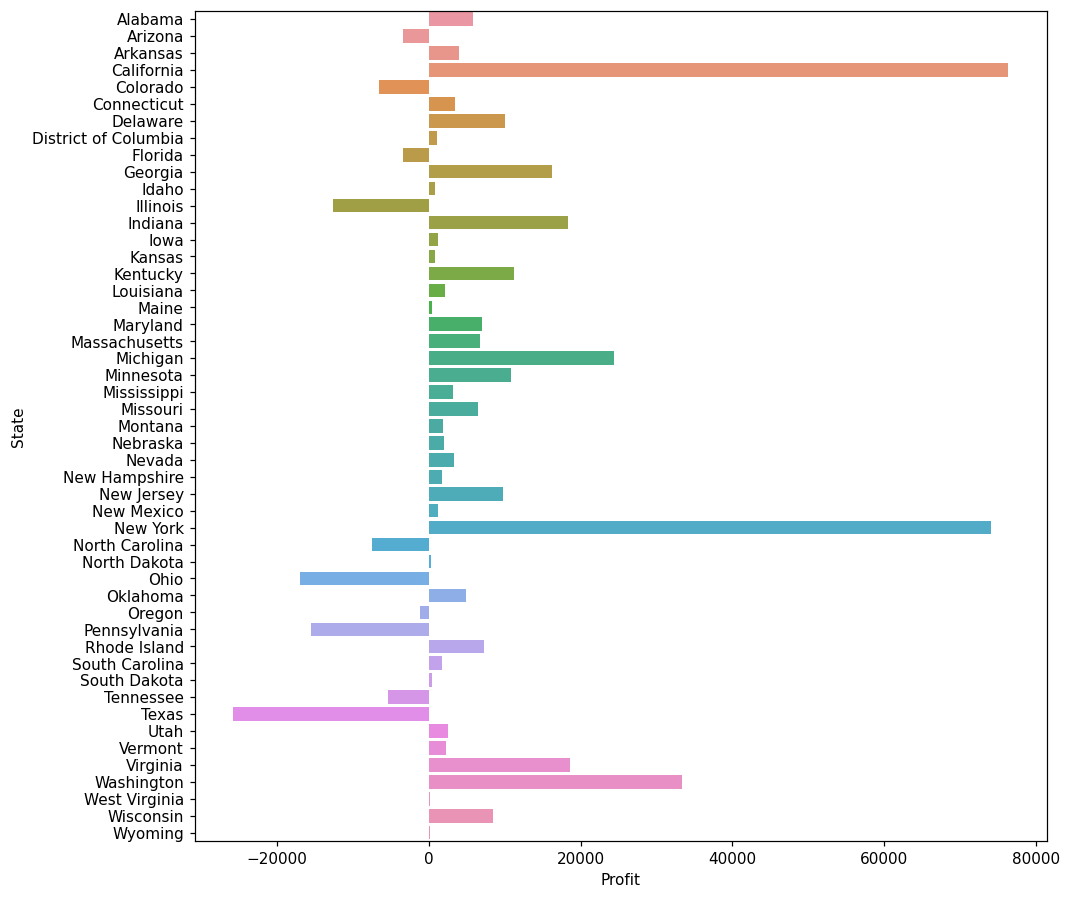

In [ ]:
##Profit relation for each State
plt.figure(figsize=(10,10),dpi=110)
state_sales_profit=locations_sales_profit.groupby(['State'],as_index=False).sum()
sns.barplot(y=state_sales_profit['State'],x=state_sales_profit['Profit'])

**From here we can see that handful of states undergo loss.**

####**Let's go deeper into the states that bring a loss and analyse the data.**

In [ ]:
states_with_loss=state_sales_profit[state_sales_profit['Profit']<=0]
states_with_loss

,State,Sales,Quantity,Profit
1,Arizona,35282.0010,862,-3427.9246
4,Colorado,32108.1180,693,-6527.8579
8,Florida,89473.7080,1379,-3399.3017
11,Illinois,80162.5370,1842,-12601.6500
31,North Carolina,55603.1640,983,-7490.9122
33,Ohio,77976.7640,1757,-16959.3178
35,Oregon,17420.7820,497,-1194.0993
36,Pennsylvania,116496.3620,2150,-15565.4035
40,Tennessee,30661.8730,681,-5341.6936
41,Texas,170124.5418,3718,-25750.9833


**Right of the bat we know that Texas brings the most loss to the table.**

>*What's interesting is that Texas also has the highest Quantity sold with good sales.*

>*Ohio and Pennsylvania follow right behind with high losses and they too have good Quantities sold.*

>*Remaining States have similar Quantities sold with varying losses.*

###**Conclusion**

**So we can say the following for the current findings**
 
>*1.Removal of the sub-category "Bookcases" and the sub-category "Tables" will help cut losses.*

>*2.If the NRE Cost and the unit cost is known then the discount of the product can worked with instead of completely removing the product to reduce loss and make use of the good sales figures.*

>*3.We know that Texas brings the most loss to the table.*

>*4.What's interesting is that Texas also has the highest Quantity sold with good sales.*

>*5.Ohio and Pennsylvania follow right behind with high losses and they too have good Quantities sold.*

>*6.Remaining States have similar Quantities sold with varying losses.*


*We can further gain more insights if we get more data such as City's Avg income and population to help set better discounts to increase sales quantity*


                             
**Thank You**







